# CHAPTER 14 금융 데이터

## 01 주식 데이터 분석

In [21]:
!pip install finance-datareader

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import FinanceDataReader as fdr  # 주식 데이터를 가져오는 모듈 사용
fdr.__version__

'0.9.70'

In [26]:
df_krx = fdr.StockListing('KRX') # 한국 상장기업을 가져온다

In [27]:
type(df_krx)

pandas.core.frame.DataFrame

In [28]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72900,1,500,0.69,72600,73100,72100,9629586,698737643400,435197147895000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,164500,2,-2100,-1.26,166100,167200,164000,2355111,389300126500,119756389042500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,417000,1,16500,4.12,404500,420000,404500,326731,135189372000,97578000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,837000,1,7000,0.84,836000,841000,826000,37730,31567336000,59572638000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,62400,3,0,0.00,62500,62500,62200,556157,34691677800,51348130080000,822886700,STK


In [29]:
df_krx.tail()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
2794,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1497,0,0,0.00,0,0,0,0,0,2365200120,1579960,KNX
2795,288490,KR7288490006,나라소프트,KONEX,일반기업부,45,2,-2,-4.26,48,48,45,87958,3969874,2358662940,52414732,KNX
2796,150440,KR7150440006,피노텍,KONEX,일반기업부,205,2,-789,-79.38,126,250,126,642282,134100763,1960909460,9565412,KNX
2797,308700,KR7308700004,테크엔,KONEX,일반기업부,238,5,-41,-14.70,316,316,238,1930,459790,952000000,4000000,KNX
2798,322190,KR7322190000,베른,KONEX,일반기업부,99,0,0,0.00,0,0,0,0,0,883594503,8925197,KNX


In [30]:
df_krx.shape, df_krx.ndim, df_krx.size

((2799, 17), 2, 47583)

In [32]:
df_krx.values  # 다차원 배열로 데이터 관리

array([['005930', 'KR7005930003', '삼성전자', ..., 435197147895000,
        5969782550, 'STK'],
       ['000660', 'KR7000660001', 'SK하이닉스', ..., 119756389042500,
        728002365, 'STK'],
       ['373220', 'KR7373220003', 'LG에너지솔루션', ..., 97578000000000,
        234000000, 'STK'],
       ...,
       ['150440', 'KR7150440006', '피노텍', ..., 1960909460, 9565412, 'KNX'],
       ['308700', 'KR7308700004', '테크엔', ..., 952000000, 4000000, 'KNX'],
       ['322190', 'KR7322190000', '베른', ..., 883594503, 8925197, 'KNX']],
      dtype=object)

In [33]:
df_krx.columns  # 열의 이름을 가져온다

Index(['Code', 'ISU_CD', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode',
       'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount',
       'Marcap', 'Stocks', 'MarketId'],
      dtype='object')

In [34]:
df_krx.dtypes  # 자료형 확인

Code            object
ISU_CD          object
Name            object
Market          object
Dept            object
Close           object
ChangeCode      object
Changes          int64
ChagesRatio    float64
Open             int64
High             int64
Low              int64
Volume           int64
Amount           int64
Marcap           int64
Stocks           int64
MarketId        object
dtype: object

In [35]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2799 non-null   object 
 1   ISU_CD       2799 non-null   object 
 2   Name         2799 non-null   object 
 3   Market       2799 non-null   object 
 4   Dept         2799 non-null   object 
 5   Close        2799 non-null   object 
 6   ChangeCode   2799 non-null   object 
 7   Changes      2799 non-null   int64  
 8   ChagesRatio  2799 non-null   float64
 9   Open         2799 non-null   int64  
 10  High         2799 non-null   int64  
 11  Low          2799 non-null   int64  
 12  Volume       2799 non-null   int64  
 13  Amount       2799 non-null   int64  
 14  Marcap       2799 non-null   int64  
 15  Stocks       2799 non-null   int64  
 16  MarketId     2799 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 371.9+ KB


In [12]:
import numpy as np  # 넘파이 모듈 사용
import seaborn as sns  # seaborn 사용

In [9]:
# 삼성전자 주식가격
df_005930 = fdr.DataReader('005930', '2020', '2024')

In [10]:
df_005930.describe()

,Open,High,Low,Close,Volume,Change
count,987.000000,987.000000,987.000000,987.000000,9.870000e+02,987.000000
mean,66977.608916,67557.142857,66363.880446,66929.787234,1.724446e+07,0.000472
std,9924.853306,9952.319755,9893.873719,9911.498806,8.112979e+06,0.015933
min,42600.000000,43550.000000,42300.000000,42500.000000,5.767902e+06,-0.063877
25%,59300.000000,59900.000000,58800.000000,59300.000000,1.221769e+07,-0.009763
50%,67100.000000,67600.000000,66600.000000,67000.000000,1.509312e+07,0.000000
75%,73850.000000,74400.000000,73100.000000,73750.000000,1.990428e+07,0.008317
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.104706


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15548\2287288002.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_005930['Close'], color='b', label='Skewness : {:.2f}'.format(df_005930['Close'].skew()), ax=ax)


ValueError: 'best)' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

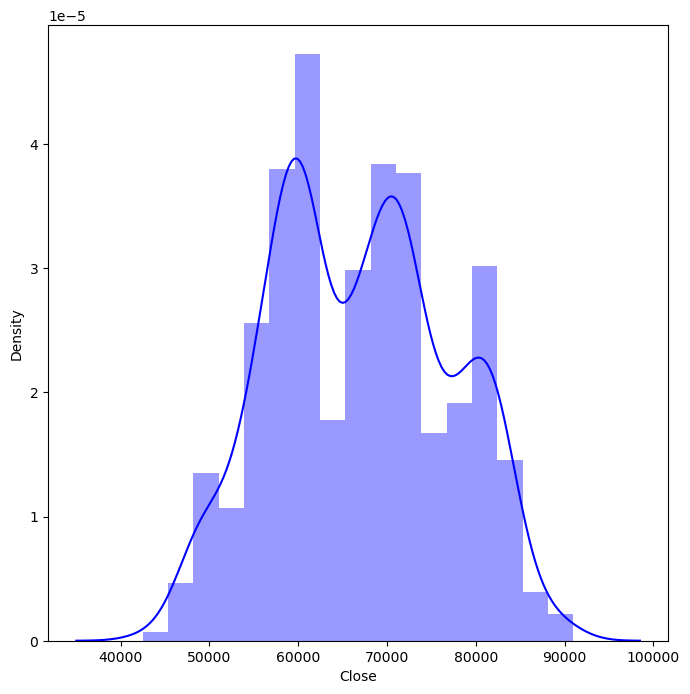

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_005930['Close'], color='b', label='Skewness : {:.2f}'.format(df_005930['Close'].skew()), ax=ax)
g = g.legend(loc='best)')
plt.show()

In [15]:
df_000660 = fdr.DataReader('000660', '2020', '2024')

In [16]:
df_000660.describe()

,Open,High,Low,Close,Volume,Change
count,987.000000,987.000000,987.000000,987.000000,9.870000e+02,987.000000
mean,105218.237082,106634.954407,103669.503546,105113.475177,3.756277e+06,0.000677
std,18662.010629,18867.653832,18303.326382,18601.404306,1.847780e+06,0.023071
min,69700.000000,71600.000000,65800.000000,69000.000000,1.190162e+06,-0.090796
25%,87700.000000,88850.000000,86350.000000,87600.000000,2.558828e+06,-0.013567
50%,104000.000000,105500.000000,102500.000000,103500.000000,3.304561e+06,0.000000
75%,121000.000000,122950.000000,119300.000000,120500.000000,4.393496e+06,0.014413
max,149000.000000,150500.000000,142500.000000,148500.000000,1.915065e+07,0.134006


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15548\4204997858.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(df_000660['Close'], color='b', label='Skewness : {:.2f}'.format(df_000660['Close'].skew()), ax=ax)


ValueError: 'best)' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

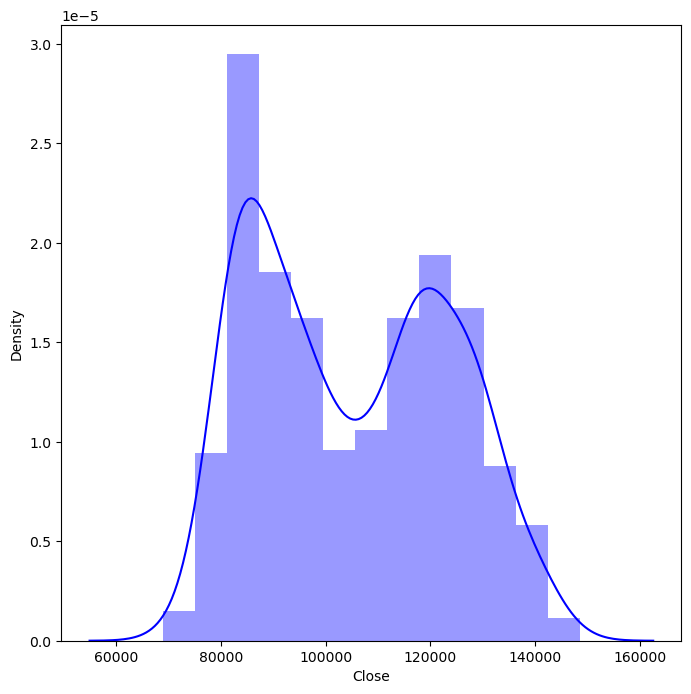

In [17]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_000660['Close'], color='b', label='Skewness : {:.2f}'.format(df_000660['Close'].skew()), ax=ax)
g = g.legend(loc='best)')
plt.show()

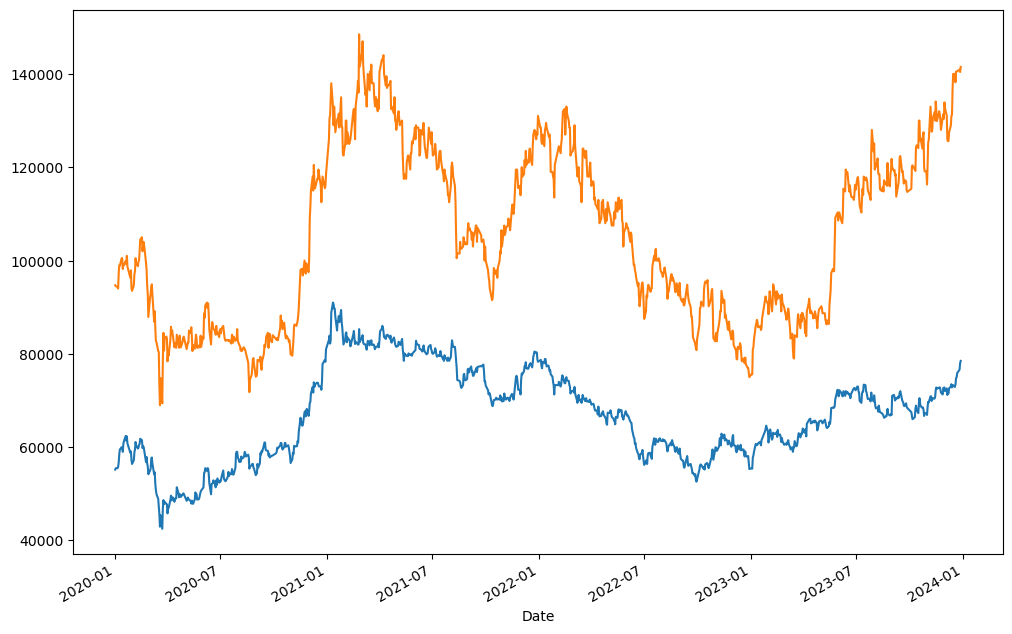

In [18]:
fig, ax=plt.subplots(1, 1)
ax = df_005930['Close'].plot(figsize=(12,8))
ax = df_000660['Close'].plot(figsize=(12,8))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3

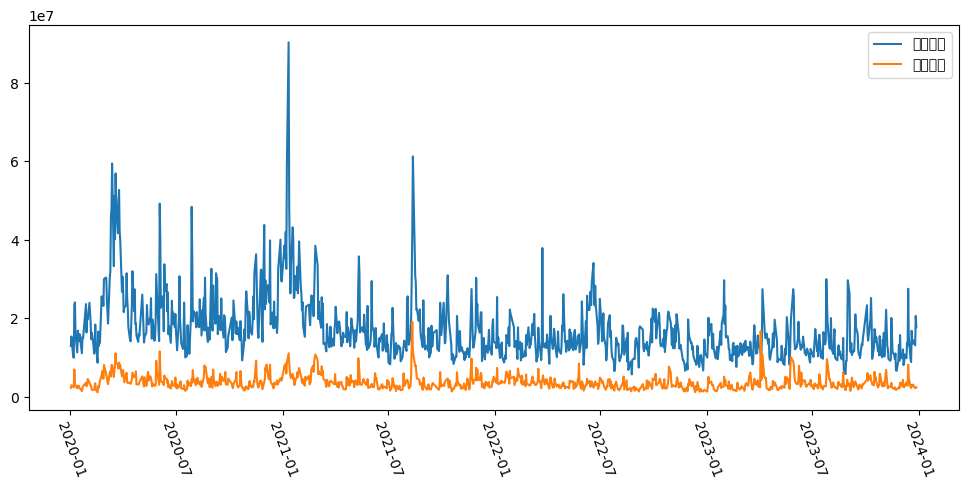

In [19]:
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
plt.plot(df_005930.index, df_005930['Volume'], label='삼성전자')
plt.plot(df_000660.index, df_000660['Volume'], label='하이닉스')
plt.xticks(rotation=-70)
plt.legend(loc='best')
plt.show()

In [20]:
df_cummax_005930=df_005930['Close'].cummax()

<Axes: xlabel='Date'>

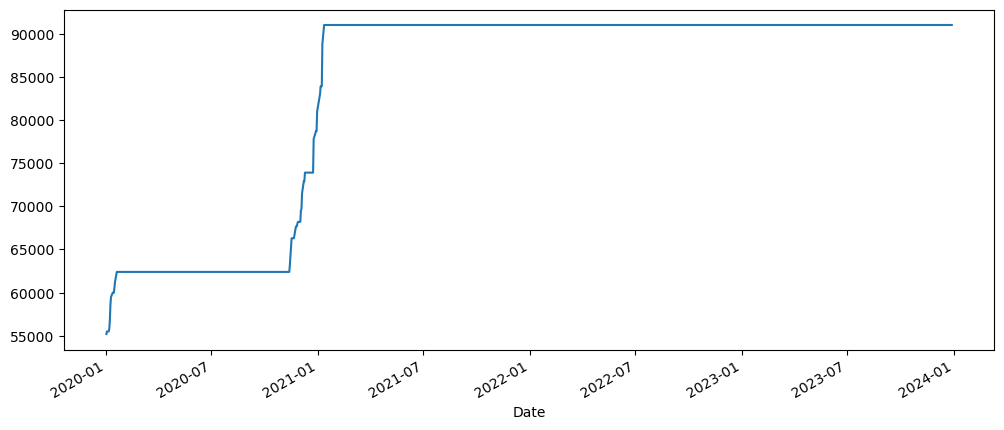

In [21]:
df_cummax_005930.plot(figsize=(12,5))

<Axes: xlabel='Date'>

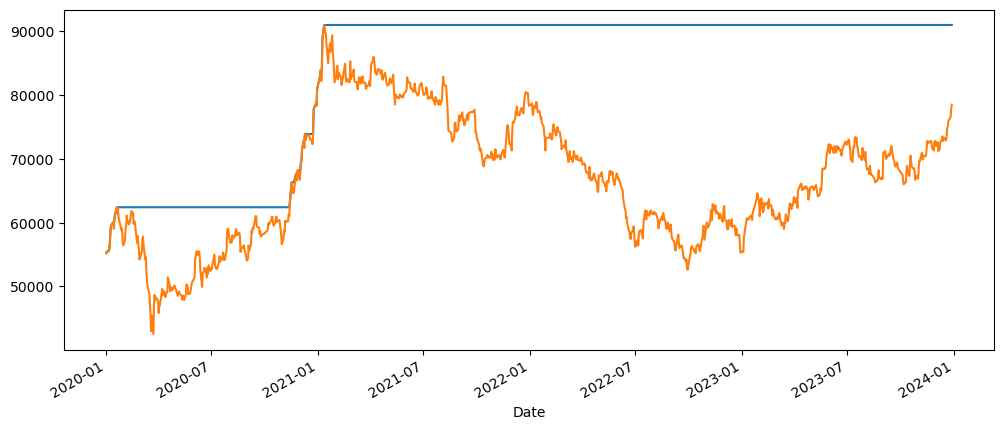

In [26]:
ax1=plt.subplot(1,1,1)  # 누적 종가에 대한 선그래프 생성
df_cummax_005930.plot(ax=ax1)  # 종가에 대한 선 그래프 생성
df_005930['Close'].plot(figsize=(12,5), ax=ax1)

In [29]:
df_cummax_000660=df_000660['Close'].cummax()  # 종가에 대한 누적금액을 가져온다

<Axes: xlabel='Date'>

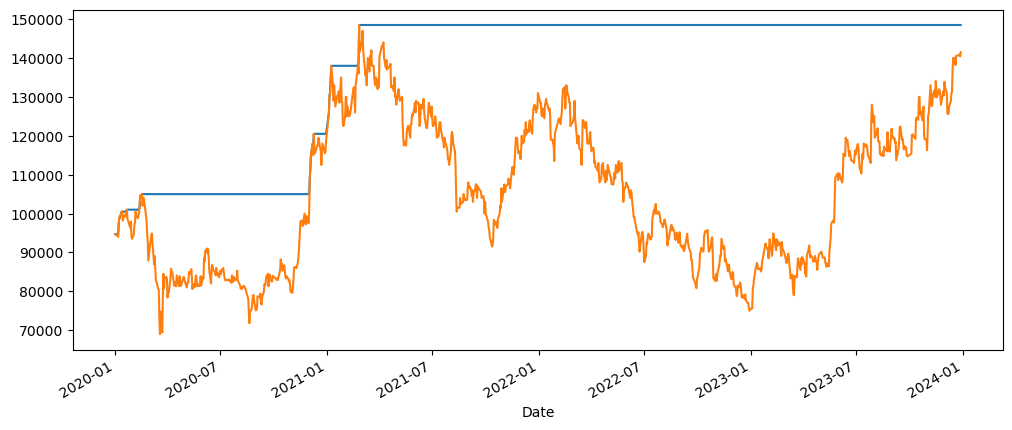

In [31]:
ax1=plt.subplot(1,1,1)
df_cummax_000660.plot(ax=ax1)
df_000660['Close'].plot(figsize=(12,5), ax=ax1)

In [36]:
!pip install mpl_finance

Defaulting to user installation because normal site-packages is not writeable


In [40]:
import mpl_finance  #캔들차크를 그리기 위해서 모듈을 사용

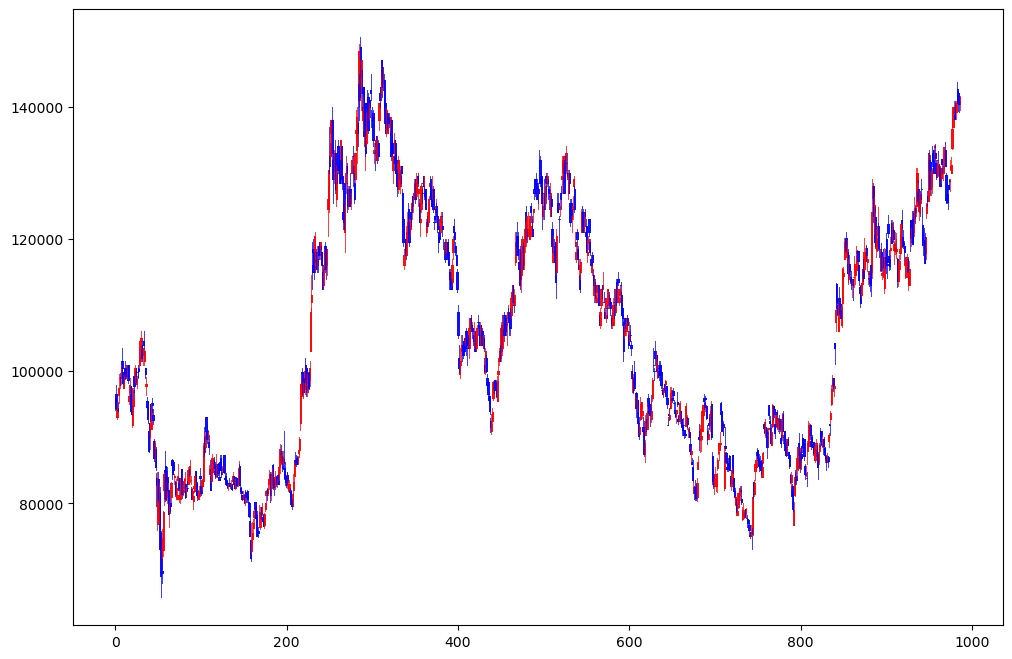

In [46]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, df_000660['Open'], #시가
                             df_000660['High'], #고가
                             df_000660['Low'], #저가
                             df_000660['Close'], #종가
                             width=1.5, colorup='r',
                             colordown='b')
plt.show()

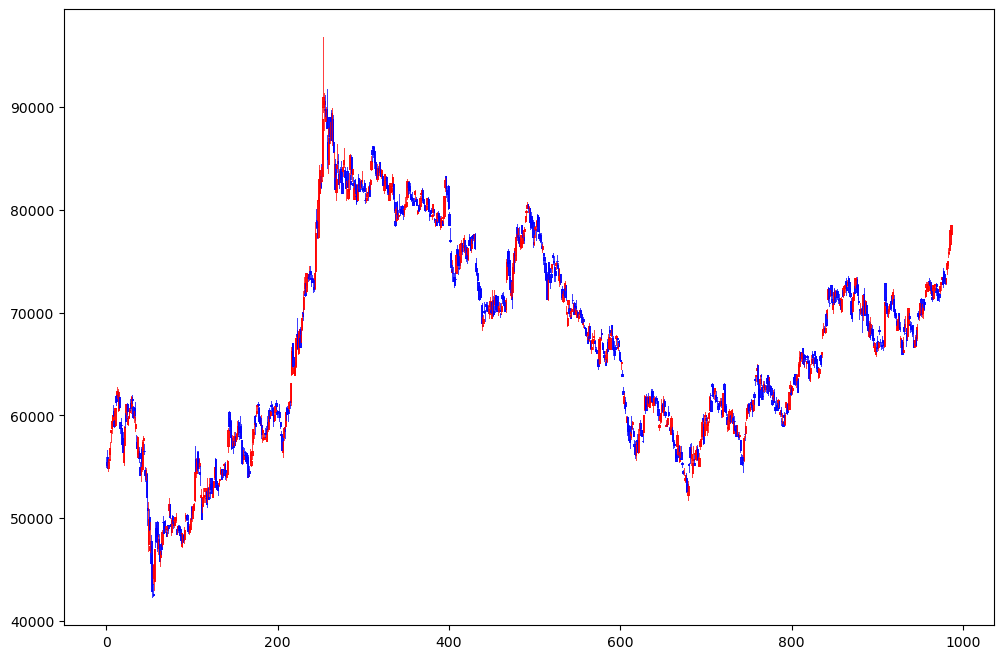

In [47]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, df_005930['Open'], #시가
                             df_005930['High'], #고가
                             df_005930['Low'], #저가
                             df_005930['Close'], #종가
                             width=1.5, colorup='r',
                             colordown='b')
plt.show()

In [50]:
df_000660['20d']=np.round(df_000660['Close'].rolling(window=20).mean(),2)  # 이동평균 계산

In [51]:
df_000660['60d']=np.round(df_000660['Close'].rolling(window=60).mean(),2)

In [52]:
df_000660['120d']=np.round(df_000660['Close'].rolling(window=120).mean(),2)

In [53]:
df_000660['20-120']=df_000660['20d']-df_000660['120d']

In [54]:
df_000660['20-60']=df_000660['20d']-df_000660['60d']

<Axes: xlabel='Date'>

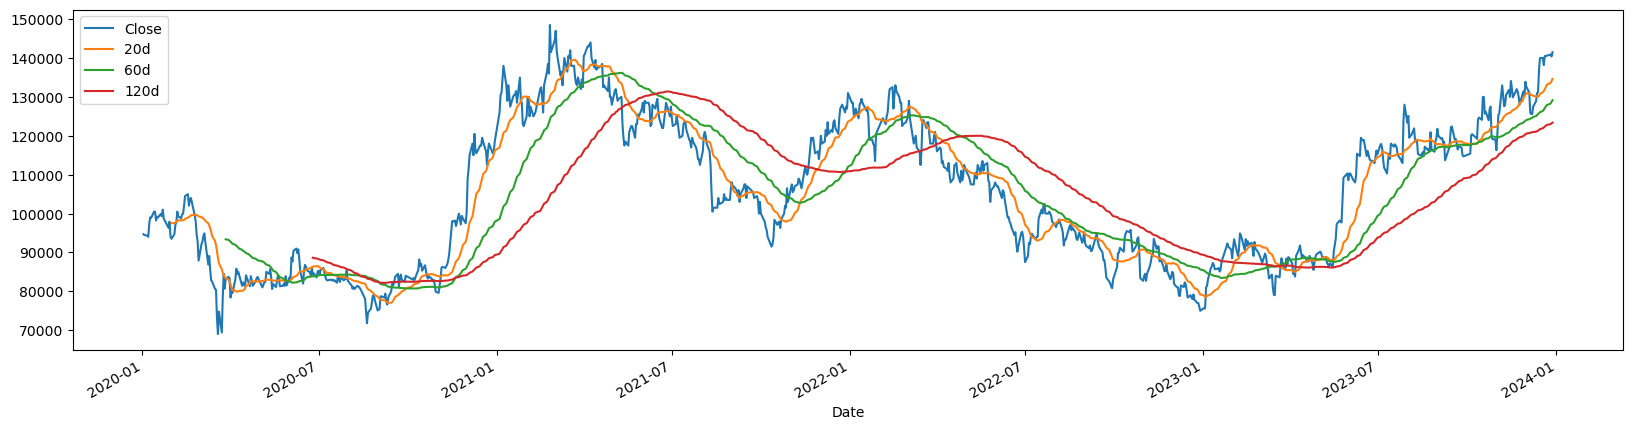

In [55]:
df_000660[['Close','20d','60d','120d']].plot(figsize=(20,5))

In [56]:
SD=65
df_000660['매매구간']=np.where(df_000660['20-120']>SD,1,0)
df_000660['매매구간']=np.where(df_000660['20-120']<-SD,-1,df_000660['매매구간'])

<Axes: xlabel='Date'>

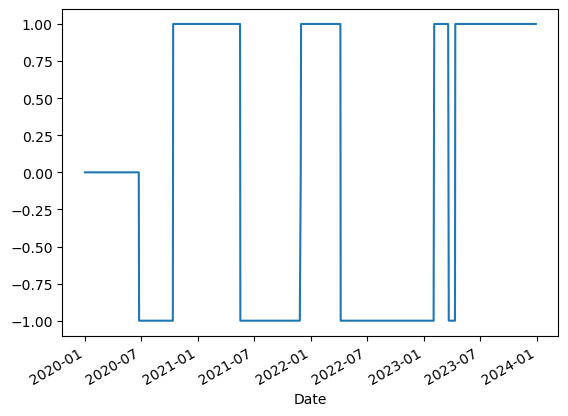

In [57]:
df_000660['매매구간'].plot(lw=1.5)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44

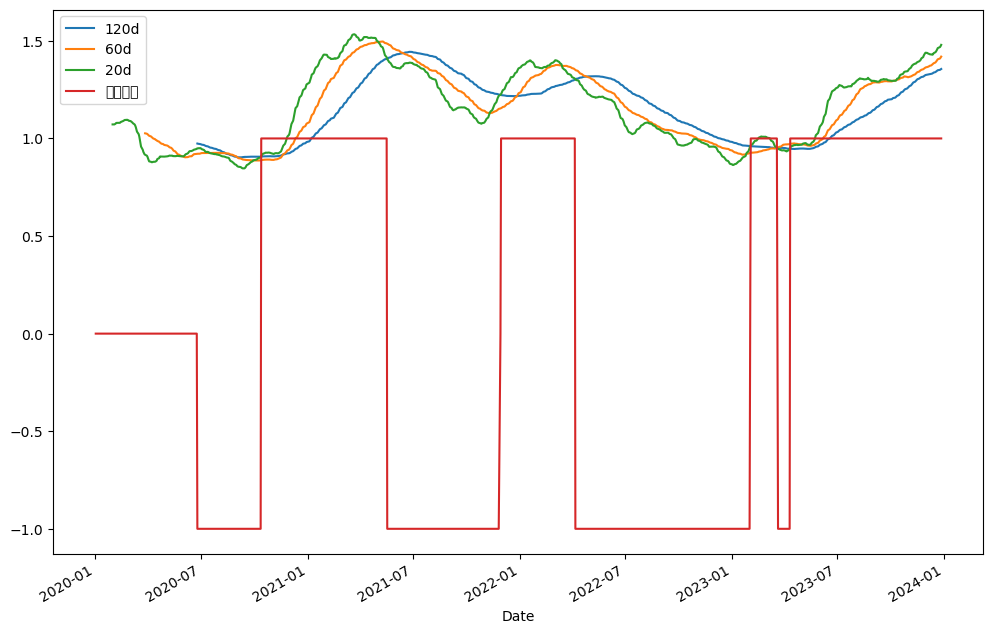

In [58]:
fig=plt.figure(figsize=(12,8))
ax3=fig.add_subplot(111)
(df_000660['120d']/df_005930['Close'].max()).plot(ax=ax3)
(df_000660['60d']/df_005930['Close'].max()).plot(ax=ax3)
(df_000660['20d']/df_005930['Close'].max()).plot(ax=ax3)
df_000660['매매구간'].plot(ax=ax3)
plt.legend()